# <a href="https://miptstats.github.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФЭФМ)</a>
## Домашнее задание 2 &mdash; часть A

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* Прислать нужно **ноутбук в формате ipynb**. Другие форматы не принимаются.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* **Если код студента недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

<font size="5">Данная часть задания проверяется автоматически. Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами <b>удалять и изменять нельзя</b>, в противном случае соответствующее задание *не будет оценено*.</font>


> *Примечание.* Рекомендуется работать с данным ноутбуком **локально** в <a href="https://miptstats.github.io/courses/python/02_jupyter.html">Jupyter Notebook</a> (например, используя <a href="https://miptstats.github.io/courses/python/01_anaconda.html#Anaconda">Anaconda</a> или <a href="https://miptstats.github.io/courses/python/02_jupyter.html#6.-Другие-редакторы">альтернативные варианты</a>). Если вы используете софт по типу Google Colaboratory, то перед отправкой боту данного ноутбука необходимо проверить, что **в ячейках с assert'ами и "# Ваше решение тут"** в метаданных присутствуют поля *metadata* с `nbgrader`. Можно открыть ноутбук с решением в текстовом редакторе (MS Word, Блокнот) и выполнить поиск по документу слова `nbgrader`. Если поиск показал ровно **17 совпадений** &mdash; можете отправлять файл боту. Если совпадений меньше, решение может быть не оценено. В таком случае попробуйте скачать файл в форме `ipynb` еще раз и перенесите решения в новый файл. **Внимание! Бот не проверяет решение и не проверяет наличие метаданных.** 

In [307]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")
%matplotlib inline

## Задачи типа A (достаточно на "хор")

---

### Задача 1

Пусть $X_1, ..., X_n$&mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$.

Реализуйте функции, вычисляющие:
* Асимптотически нормальную оценку $\theta$;
* Оценку асимптотической дисперсии данной оценки.
* Асимптотический доверительный интервал на $\theta$.

Выборка $X_1, \ldots, X_n \sim Pois(\theta) \hspace{2cm} \widehat{\theta} = \overline{X}$

Из ЦПТ имеем
$$\sqrt{n} \cdot \dfrac{\overline{X} - \theta}{\theta} \stackrel{d}{\to} \mathcal{N}(0,1)$$
Оценка  $\widehat{\theta} = \overline{X}$ асимптотически нормальная, сильно состоятельная, откуда доверительный интервал уровня доверия $\alpha$:
$$P_{\theta}\l(\overline{X} - z_{\frac{1+\alpha}{2}}\sqrt{\dfrac{\overline{X}}{n}} \hspace{0.3cm} < \hspace{0.3cm} \theta \hspace{0.3cm} < \hspace{0.3cm} \overline{X} + z_{\frac{1+\alpha}{2}}\sqrt{\dfrac{\overline{X}}{n}}\ \r) \to \alpha$$
где $z_p$ квантиль $\mathcal{N}(0,1)$

In [308]:
def poiss_asymp_norm_est(sample):
    return np.mean(sample)

In [309]:
x = np.array([1, 5, 5, 3, 2, 4, 2, 8, 4, 6])
assert np.allclose(poiss_asymp_norm_est(x), 4, atol=1e-2)

Асимптотическая дисперсия $\sigma^2 = \overline{X}$

In [310]:
def poiss_asymp_var_est(sample):
    return np.mean(sample)

In [311]:
x = np.array([1, 5, 5, 3, 2, 4, 2, 8, 4, 6])
assert np.allclose(poiss_asymp_var_est(x), 4, atol=1e-2)

$$P_{\theta}\l(\overline{X} - z_{\frac{1+\alpha}{2}}\sqrt{\dfrac{\overline{X}}{n}} \hspace{0.3cm} < \hspace{0.3cm} \theta \hspace{0.3cm} < \hspace{0.3cm} \overline{X} + z_{\frac{1+\alpha}{2}}\sqrt{\dfrac{\overline{X}}{n}}\ \r) \to \alpha$$

In [312]:
def poiss_asymp_confint(sample, alpha=0.95):
    """
    :param sample: sample
    :param alpha: confidence level
    :return: confidence interval
    """
    n = len(sample)
    lower = np.mean(sample) - sps.norm(0, 1).ppf((1 + alpha)/2) * (np.sqrt(np.mean(sample) / n))
    upper = np.mean(sample) + sps.norm(0, 1).ppf((1 + alpha)/2) * (np.sqrt(np.mean(sample) / n))
    return float(lower), float(upper)

In [313]:
x = np.array([1, 5, 5, 3, 2, 4, 2, 8, 4, 6])
assert np.allclose(poiss_asymp_confint(x), [2.76, 5.24], atol=1e-2)

Проверим, что при большом размере выборки получившийся интервал действительно имеет уровень доверия $\approx 0.95$:

In [314]:
np.random.seed(0)
dist = sps.poisson(5)
l, r = np.stack([
    poiss_asymp_confint(dist.rvs(size=(500,)))
    for _ in range(10_000)
], axis=1)
estimated_conf_level = np.mean((l <= 5) & (5 <= r))
assert 0.94 <= estimated_conf_level <= 0.96, f"Неправильный уровень доверия {estimated_conf_level:.4f}"

-----

### Задача 2
Дана выборка $X_1, ..., X_n$ из распределения Лапласа с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$. Реализуйте функцию, вычисляющую асимптотический доверительный интервал для параметра $\theta$.

In [315]:
def laplace_asymp_confint(sample, alpha=0.95):
    """
    :param sample: sample
    :param alpha: confidence level
    :return: confidence interval
    """
    n = len(sample)
    variance = sps.laplace(np.mean(sample)).var()
    lower = np.mean(sample) - sps.norm(0, 1).ppf((1 + alpha) / 2) * np.sqrt(variance / n)
    upper = np.mean(sample) + sps.norm(0, 1).ppf((1 + alpha) / 2) * np.sqrt(variance / n)
    return lower, upper

In [316]:
np.random.seed(0)
dist = sps.laplace(loc=2)
l, r = np.stack([
    laplace_asymp_confint(dist.rvs(size=(500,)))
    for _ in range(10_000)
], axis=1)
estimated_conf_level = np.mean((l <= 2) & (2 <= r))
assert 0.94 <= estimated_conf_level <= 0.96, f"Неправильный уровень доверия {estimated_conf_level:.4f}"

---

### Задача 3
В этой задаче нужно визуализировать *свойство асимптотической нормальности*. Посмотрите также на <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html#Закон-больших-чисел">этот ноутбук</a>.

*a).* Пусть $X_1, ..., X_n$&mdash; выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\widehat{\theta} = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

<a href="https://miptstats.github.io/courses/python/07_random.html#2.-Работа-с-библиотекой-scipy.stats.">Сгенерируйте</a> множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">посчитайте</a> оценки  $\widehat{\theta}_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 1$.

In [317]:
np.random.seed(0)
theta = 1
n = 500
num_samples = 300
x = sps.uniform.rvs(loc=0, scale=theta, size=(num_samples, n))
estimation = 2 * np.cumsum(x, axis=1) / np.arange(1, n+1)
z = (2 * np.cumsum(x, axis=1) / np.arange(1, n+1) - theta) * np.sqrt(np.arange(1, n+1))

In [318]:
assert x.shape == estimation.shape == z.shape == (300, 500)
assert ((0 <= x) & (x <= 1)).all()
assert np.allclose(((1/3 <= x) & (x <= 2/3)).mean(), 1/3, atol=1e-2)
assert np.allclose(estimation[1, 2], 2 * (x[1, 0] + x[1, 1] + x[1, 2]) / 3)
assert np.allclose(z[1, 2], 3**0.5 * estimation[1, 2] - 3**0.5)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ <a href="https://miptstats.github.io/courses/python/06_matplotlib.html">с помощью `plt.plot`</a>. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

In [319]:
def plot_trajectories(z):
    """
    :param z: estimations for CLT
    :return: graph
    """
    plt.figure(figsize = (7, 7))
    plt.title("$X \sim U[0,1]\qquad Z_n = \sqrt{n} \left( 2\overline{X} - \\theta \\right)$")
    for i in range(num_samples):
        plt.plot(np.arange(500), z[i], alpha=0.05, color='green')
        plt.xlabel('sample size (n)')
        plt.ylabel('value of $Z_n$')

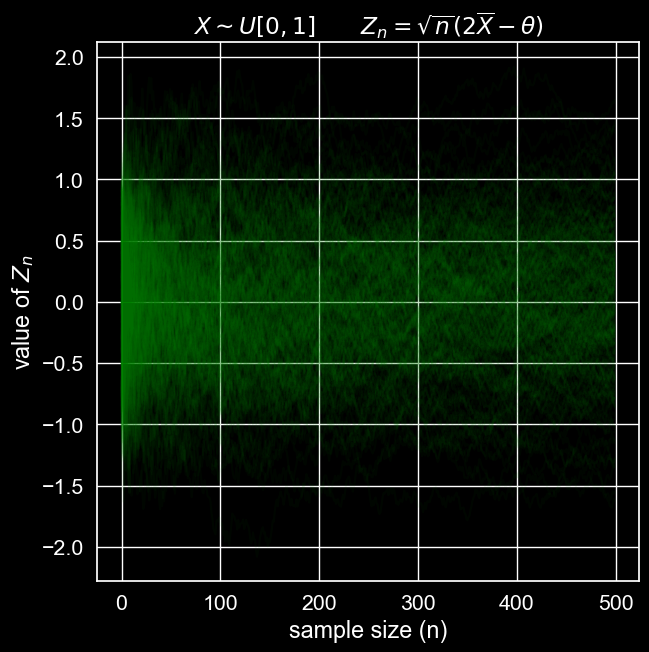

In [320]:
plot_trajectories(z)
lines = plt.gca().lines
assert len(lines) == z.shape[0], "Неверное к-во линий. Не вызывайте plt.show()!"
assert np.allclose(lines[42].get_ydata(), z[42]), "Неверные координаты линий"
assert lines[42].get_alpha() == 0.05, "Неправильная прозрачность линий"
assert len(set(line.get_color() for line in lines)) == 1, "Цвета должны быть одинаковыми"

Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте <a href="https://miptstats.github.io/courses/ad_fivt/lec3_means.html#3.-Когда-придет-мой-автобус?-Или-каково-среднее-время-ожидания-автобуса.">гистограмму и график плотности</a> распределения $\mathcal{N}(0, 
\sigma^2)$, где $\sigma^2$ &mdash; асимптотическая дисперсия.  Не забудьте сделать легенду.

In [321]:
def plot_distribution(z):
    """
    :param z: estimations for CLT
    :return: histogram and pdf plot
    """
    plt.figure(figsize=(10, 5))
    plt.title('Histogram of sample $\{Z_{i,500}\}_{i=1}^{300}$ and pdf for $\mathcal{N}(0, \sigma^2)$')
    plt.hist(z[:, n-1], bins=20, color='blue', density=True, label='histogram')
    grid = np.linspace(-2, 2, 100)
    plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=np.sqrt(1/3)), color='red', label='$pdf \mathcal{N}\ (0,\sigma^2)$')
    plt.xlabel('sample values')
    plt.legend()

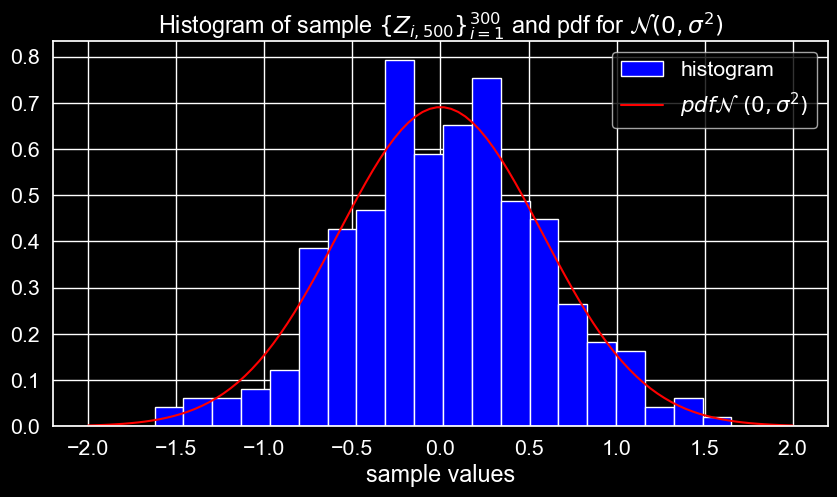

In [322]:
plot_distribution(z)
axes = plt.gca()
total_hist_area = sum(hist_rect.get_width() * hist_rect.get_height()
                      for hist_rect in axes.patches)
assert np.allclose(total_hist_area, 1.0, atol=1e-1), "Гистограмма должна быть нормированна"
assert len(axes.lines) == 1, "Нет графика плотности"
pdf = axes.lines[0]
pdf_fragment = pdf.get_ydata()[np.abs(pdf.get_xdata()) <= 0.3]
assert len(pdf_fragment) > 0, "Некорректный график плотности"
assert ((0.6 <= pdf_fragment) & (pdf_fragment <= 0.7)).all(), "Некорректный график плотности"
assert axes.get_legend() is not None, "Нет легенды"
assert len(axes.get_legend_handles_labels()[1]) == 2, "Не все графики подписаны"

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** 

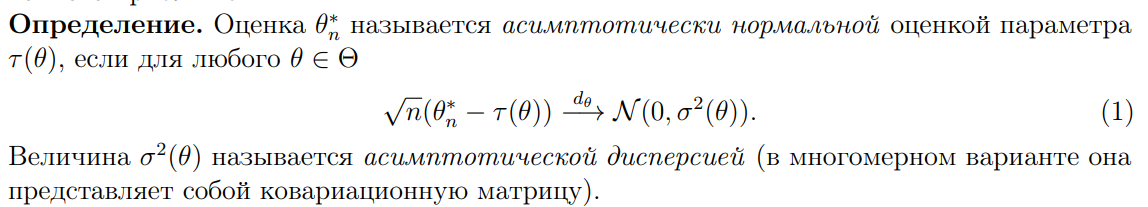

Судить о подтверждении теоретических результатов на практике можно только при устремлении размеров выборок(n) к бесконечности. В нашем случае, для $n=500$, видим достаточно хорошее подтверждение того, что асимптотическая дисперсия является хорошей оценкой параметра дисперсии распределения выборки.